In [132]:
import numpy as np
import pandas as pd

In [133]:
# Set numpy seed 
np.random.seed(2)

In [134]:
# First, generate our dataset
data = np.random.rand(100, 3)
df = pd.DataFrame(data, columns=["A", "B", "C"])
weights = [1, -1, 1]
print(df.head())

          A         B         C
0  0.435995  0.025926  0.549662
1  0.435322  0.420368  0.330335
2  0.204649  0.619271  0.299655
3  0.266827  0.621134  0.529142
4  0.134580  0.513578  0.184440


In [135]:
# Generate a ranking of each variable (we want to maximize B and minimize C)
# For this, sort each column iteratively and then assign values
ranked_df = df.copy()
for i in range(len(ranked_df.columns)):
    col = ranked_df.columns[i]
    weight = weights[i]
    ranked_df = ranked_df.sort_values(by=[col])
    ranked_df[col] = weight * np.arange(1, len(ranked_df) + 1)
print(ranked_df.head())

     A   B  C
67  54 -21  1
62  46 -80  2
25  75 -39  3
74  74 -84  4
51  62  -8  5


Text(0, 0.5, 'Value Sum')

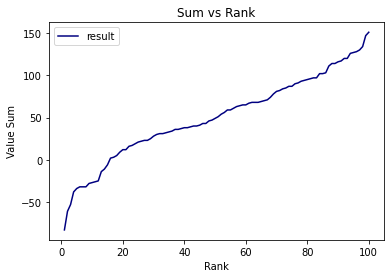

In [136]:
# Build the sum of each column and order
ranked_df["result"] = ranked_df.sum(axis=1)
ranked_df = ranked_df.sort_values(by=["result"])
ranked_df["rank"] = np.arange(1, len(ranked_df) + 1)
ax = ranked_df.plot("rank", "result", colormap='jet', title="Sum vs Rank")
ax.set_xlabel("Rank")
ax.set_ylabel("Value Sum")

In [137]:
optimal_index = ranked_df.iloc[0].name
print("The optimal combination is: " + str(df.loc[optimal_index].values))
# I tested it up to 20 000 000 values, for these, it ran in 30 Seconds.

The optimal combination is: [0.02520142 0.94045049 0.10213795]
